# Business and Data Understanding


# Spark Funds has two minor constraints for investments:

1.	It wants to invest between 5 to 15 million USD per round of investment
2.	It wants to invest only in English-speaking countries because of the ease of communication with the companies it would invest in.

# What is Spark Funds’ business objective?

The business objectives and goals of data analysis are pretty straightforward.

1. **Business objective:**The objective is to identify the best sectors, countries, and a suitable investment type for making investments. The overall strategy is to invest where others are investing, implying that the 'best' sectors and countries are the ones 'where most investors are investing'.


2. **Goals of data analysis:** Our goals are divided into three sub-goals:



  - **Investment type analysis:** Comparing the typical investment amounts in the venture, seed, angel, private equity etc. so    
     that Spark Funds can choose the type that is best suited for their strategy.
 
 
  - **Country analysis:** Identifying the countries which have been the most heavily invested in the past. These will be Spark       Funds’ favourites as well.
 
 
  - **Sector analysis:** Understanding the distribution of investments across the eight main sectors. (Note that we are interested in the eight 'main sectors' provided in the mapping file. The two files — companies and rounds2 — have numerous sub-sector names; hence, you will need to map each sub-sector to its main sector.


# Checkpoint 1: Data Cleaning 

In [102]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
sns.set()

In [103]:
# import chartdet
import chardet


In [3]:
with open("companies.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read())
    
print(result)

{'encoding': 'Windows-1254', 'confidence': 0.4610845903762258, 'language': 'Turkish'}


In [4]:
with open("rounds2.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read())
    
print(result)

{'encoding': 'Windows-1254', 'confidence': 0.4186155476629225, 'language': 'Turkish'}


In [5]:
companies=pd.read_csv("companies.csv",encoding="cp437")
companies

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
...,...,...,...,...,...,...,...,...,...,...
66363,/Organization/Zznode-Science-And-Technology-Co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66364,/Organization/Zzzzapp-Com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66365,/Organization/├üEron,├üERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/Organization/├öAsys-2,├öasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014


In [6]:
round2=pd.read_csv('rounds2.csv',encoding='cp437')
round2

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/ORGANIZATION/ZZZZAPP-COM,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/πüeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/ORGANIZATION/├öASYS-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


**Question 1**



How many unique companies are present in rounds2?

In [7]:
round2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [8]:
round2.isna().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [9]:
round2['company_permalink']=round2['company_permalink'].str.lower()

In [10]:
round2.nunique()

company_permalink           66373
funding_round_permalink    114949
funding_round_type             14
funding_round_code              8
funded_at                    5033
raised_amount_usd           22095
dtype: int64

In [11]:
# Let's check the number of unique companies present in rounds2
len(round2['company_permalink'].unique())


66373

In [12]:
round2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


**Answer:- The total number of unique companies present in round2 is 66373**

**Qestion 2**


How many unique companies are present in the companies file?

In [13]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [14]:
companies['permalink']=companies['permalink'].str.lower()

In [15]:
#Let's Calculate the unique values
companies.nunique()

permalink        66368
name             66099
homepage_url     61191
category_list    27296
status               4
country_code       137
state_code         311
region            1092
city              5111
founded_at        3978
dtype: int64

In [16]:
# Let's check the number of unique companies present in companies
len(companies['permalink'].unique())


66368

**Answer:- The total number of unique companies present in companies is 66368**

**Question-3**

In the companies data frame, which column can be used as the  unique key for each company? Write the name of the column.


**Answer**

**Check-1 Not Null**

**Check-2 Unique for all records**



In [17]:
# Check -1
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [18]:
#Check 2:
companies.nunique()

permalink        66368
name             66099
homepage_url     61191
category_list    27296
status               4
country_code       137
state_code         311
region            1092
city              5111
founded_at        3978
dtype: int64

**Only permalink passed both the checks and can be used to indentify each company**

**Question-4**

Are there any companies in the rounds2 file which are not  present in companies ? Answer Y/N.


In [19]:
set1 = set(companies['permalink'].values)
set2 = set(round2['company_permalink'].values)
common = set1.intersection(set2)
uncommon = set1.symmetric_difference(set2)

In [20]:
print(len(common))
print(len(uncommon))

66334
73


In [21]:
uncommon

{'/organization/affluent-attachπ⌐-club-2',
 '/organization/affluent-attach├⌐-club-2',
 '/organization/asiansbookγäó',
 '/organization/asiansbook┬äó',
 '/organization/borπ⌐al-bikes-incorporated',
 '/organization/bor├⌐al-bikes-incorporated',
 '/organization/bricoprivπ⌐-com',
 '/organization/bricopriv├⌐-com',
 '/organization/capptπ║',
 '/organization/cappt├║',
 '/organization/cr├¿me-ciseaux',
 '/organization/e-cπübica',
 '/organization/e-c├èbica',
 '/organization/energystone-games-╟ü╡τ\xa0│╞╕╕╞êå',
 '/organization/energystone-games-╟ü╡╟ƒ│╞╕╕╞êå',
 '/organization/etool-ioγö',
 '/organization/etool-io┬ö',
 '/organization/grπífica-en-lπ¡nea',
 '/organization/gr├ífica-en-l├¡nea',
 '/organization/huizuche-com-µâáτº\xa0φ╜ª',
 '/organization/huizuche-com-╞âá╟ºƒφ╜ª',
 '/organization/ignia-bienes-raπ¡ces',
 '/organization/ignia-bienes-ra├¡ces',
 '/organization/inveno-φï▒σ¿üφ»║',
 '/organization/iproof---the-foundation-for-the-internet-of-thingsγäó',
 '/organization/iproof---the-foundation-for-the-

**Answer:Yes**

**Question-5**

Merge the two data frames so that all  variables (columns)  in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame ?


In [22]:
master_frame=pd.merge(companies, round2, how="inner", left_on="permalink", right_on="company_permalink")
master_frame.shape

(114909, 16)

In [23]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114909 entries, 0 to 114908
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   permalink                114909 non-null  object 
 1   name                     114908 non-null  object 
 2   homepage_url             108779 non-null  object 
 3   category_list            111512 non-null  object 
 4   status                   114909 non-null  object 
 5   country_code             106255 non-null  object 
 6   state_code               103989 non-null  object 
 7   region                   104766 non-null  object 
 8   city                     104769 non-null  object 
 9   founded_at               94407 non-null   object 
 10  company_permalink        114909 non-null  object 
 11  funding_round_permalink  114909 non-null  object 
 12  funding_round_type       114909 non-null  object 
 13  funding_round_code       31135 non-null   object 
 14  fund

In [24]:
master_frame=master_frame.drop(['company_permalink'],axis=1)


In [25]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114909 entries, 0 to 114908
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   permalink                114909 non-null  object 
 1   name                     114908 non-null  object 
 2   homepage_url             108779 non-null  object 
 3   category_list            111512 non-null  object 
 4   status                   114909 non-null  object 
 5   country_code             106255 non-null  object 
 6   state_code               103989 non-null  object 
 7   region                   104766 non-null  object 
 8   city                     104769 non-null  object 
 9   founded_at               94407 non-null   object 
 10  funding_round_permalink  114909 non-null  object 
 11  funding_round_type       114909 non-null  object 
 12  funding_round_code       31135 non-null   object 
 13  funded_at                114909 non-null  object 
 14  rais

In [26]:
#missing value in master_frame
master_frame.isnull().sum()

permalink                      0
name                           1
homepage_url                6130
category_list               3397
status                         0
country_code                8654
state_code                 10920
region                     10143
city                       10140
founded_at                 20502
funding_round_permalink        0
funding_round_type             0
funding_round_code         83774
funded_at                      0
raised_amount_usd          19973
dtype: int64

In [27]:
# summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                   0.00
name                        0.00
homepage_url                5.33
category_list               2.96
status                      0.00
country_code                7.53
state_code                  9.50
region                      8.83
city                        8.82
founded_at                 17.84
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.90
funded_at                   0.00
raised_amount_usd          17.38
dtype: float64

**The number of observation are present in  master_frame are 114909**

In [28]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114909 entries, 0 to 114908
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   permalink                114909 non-null  object 
 1   name                     114908 non-null  object 
 2   homepage_url             108779 non-null  object 
 3   category_list            111512 non-null  object 
 4   status                   114909 non-null  object 
 5   country_code             106255 non-null  object 
 6   state_code               103989 non-null  object 
 7   region                   104766 non-null  object 
 8   city                     104769 non-null  object 
 9   founded_at               94407 non-null   object 
 10  funding_round_permalink  114909 non-null  object 
 11  funding_round_type       114909 non-null  object 
 12  funding_round_code       31135 non-null   object 
 13  funded_at                114909 non-null  object 
 14  rais

**Cleaning the data**

Inspecting Null Values

Dropping Unnecessary columns

Dropping Uncessary rows

In [29]:
# Inspecting Null Value column-wise
master_frame.isnull().sum(axis=0)

permalink                      0
name                           1
homepage_url                6130
category_list               3397
status                         0
country_code                8654
state_code                 10920
region                     10143
city                       10140
founded_at                 20502
funding_round_permalink        0
funding_round_type             0
funding_round_code         83774
funded_at                      0
raised_amount_usd          19973
dtype: int64

In [30]:
#Inspecting the Null values percentage , column-wise
print(round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2))

permalink                   0.00
name                        0.00
homepage_url                5.33
category_list               2.96
status                      0.00
country_code                7.53
state_code                  9.50
region                      8.83
city                        8.82
founded_at                 17.84
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.90
funded_at                   0.00
raised_amount_usd          17.38
dtype: float64


In [31]:
#Converting $ to million $.
master_frame['raised_amount_usd'] = master_frame['raised_amount_usd']/1000000
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10.000000
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,0.700000
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3.406878
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2.000000


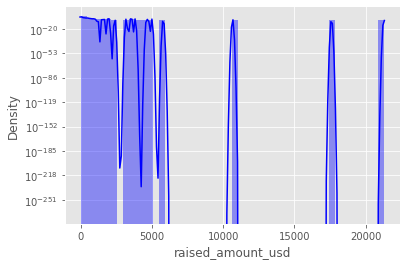

In [32]:
import seaborn as sns

# Create a distribution plot
plt.style.use("ggplot")
sns.distplot(master_frame['raised_amount_usd'],color='b',bins=50)
plt.yscale('log')
#plt.xlim(0, 76)
plt.show()

In [33]:
#Inspecting the Null values percentage , column-wise
print(round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2))

permalink                   0.00
name                        0.00
homepage_url                5.33
category_list               2.96
status                      0.00
country_code                7.53
state_code                  9.50
region                      8.83
city                        8.82
founded_at                 17.84
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.90
funded_at                   0.00
raised_amount_usd          17.38
dtype: float64


**There are so many NAN values in columns funding_round_code and founded at so we can drop this columns**

In [34]:
# Removing the columns
master_frame=master_frame.drop(['funding_round_code','founded_at'],axis=1)


In [35]:
#Inspecting the Null values percentage , column-wise
print(round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2))

permalink                   0.00
name                        0.00
homepage_url                5.33
category_list               2.96
status                      0.00
country_code                7.53
state_code                  9.50
region                      8.83
city                        8.82
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          17.38
dtype: float64


In [36]:
# we can drop unnessary columns
master_frame=master_frame.drop(['state_code','region','city'],axis=1)

In [37]:
#Inspecting the Null values percentage , column-wise
print(round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2))

permalink                   0.00
name                        0.00
homepage_url                5.33
category_list               2.96
status                      0.00
country_code                7.53
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          17.38
dtype: float64


**Dropping Unnessary rows**

In [38]:
#Rows of missing values can be removed when the NULL values (missing values) are around 5% (or less) of the total data.
master_frame = master_frame[~(master_frame['homepage_url'].isnull()|
                             master_frame['category_list'].isnull())]

In [39]:
#Inspecting the Null values percentage , column-wise
print(round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2))

permalink                   0.00
name                        0.00
homepage_url                0.00
category_list               0.00
status                      0.00
country_code                5.69
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          15.49
dtype: float64


In [40]:
#Now data is clean
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106351 entries, 0 to 114908
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   permalink                106351 non-null  object 
 1   name                     106350 non-null  object 
 2   homepage_url             106351 non-null  object 
 3   category_list            106351 non-null  object 
 4   status                   106351 non-null  object 
 5   country_code             100298 non-null  object 
 6   funding_round_permalink  106351 non-null  object 
 7   funding_round_type       106351 non-null  object 
 8   funded_at                106351 non-null  object 
 9   raised_amount_usd        89882 non-null   float64
dtypes: float64(1), object(9)
memory usage: 8.9+ MB


In [41]:
# Saving the data for further inspection
master_frame.to_csv('master_frame.csv')

# Check point-2:Funding Type Analysis

In [42]:
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.000000
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,0.700000
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3.406878
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2.000000


In [43]:
#Observing the unique funding_round_type
master_frame.funding_round_type.value_counts()

venture                  51743
seed                     28689
debt_financing            6476
angel                     5875
undisclosed               4117
equity_crowdfunding       2175
grant                     2107
private_equity            2068
convertible_note          1687
post_ipo_equity            620
product_crowdfunding       402
post_ipo_debt              152
non_equity_assistance      151
secondary_market            89
Name: funding_round_type, dtype: int64

In [44]:
#Retaining the rows with only four investment types
master_frame = master_frame[(master_frame['funding_round_type'] == 'venture') 
                            | (master_frame['funding_round_type'] == 'seed')
                            | (master_frame['funding_round_type'] == 'angel')
                            | (master_frame['funding_round_type'] == 'private_equity')]
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.000000
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,0.700000
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3.406878
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2.000000


In [45]:
#Observing the unique funding_round_type
master_frame.funding_round_type.value_counts()

venture           51743
seed              28689
angel              5875
private_equity     2068
Name: funding_round_type, dtype: int64

In [46]:
#Converting $ to million $.
#master_frame['raised_amount_usd'] = master_frame['raised_amount_usd']/1000000
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.000000
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,0.700000
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3.406878
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2.000000


In [47]:
#Create a pieplot
import matplotlib.pyplot as plt
import seaborn as sns


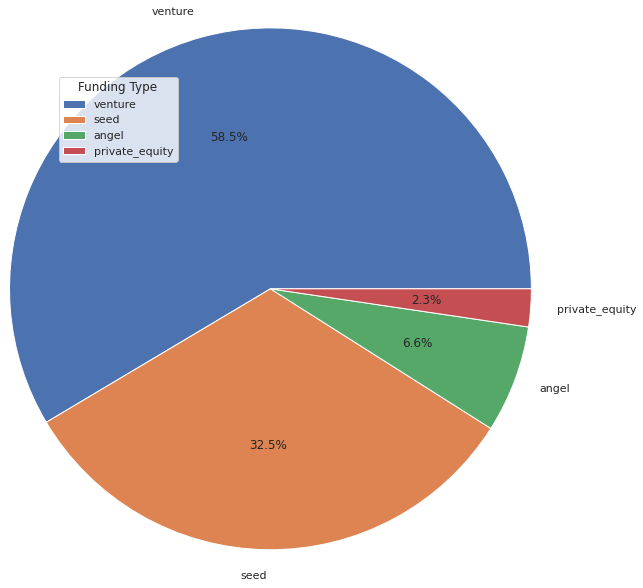

In [48]:
sns.set(rc={'figure.figsize':(11,8)})
sns.set_style("whitegrid")
round_types = master_frame.funding_round_type.value_counts()
plt.pie(round_types.values, labels=round_types.index, autopct='%.1f%%',radius=1.5, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' })
plt.legend(title="Funding Type",loc='upper left')
plt.show()

In [49]:
#Let's check the median, mean and mode
master_frame.describe()

,raised_amount_usd
count,76569.000000
mean,9.239976
std,75.421742
min,0.000000
25%,0.400000
50%,2.000000
75%,7.601029
max,17600.000000


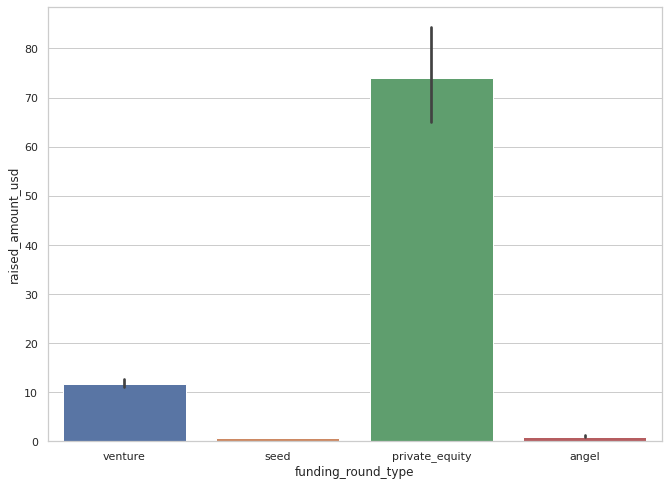

In [50]:
# Let's plot the bar plot
sns.set(rc={'figure.figsize':(11,8)})
sns.set_style("whitegrid")
sns.barplot(x='funding_round_type',y='raised_amount_usd',data=master_frame)
plt.show()

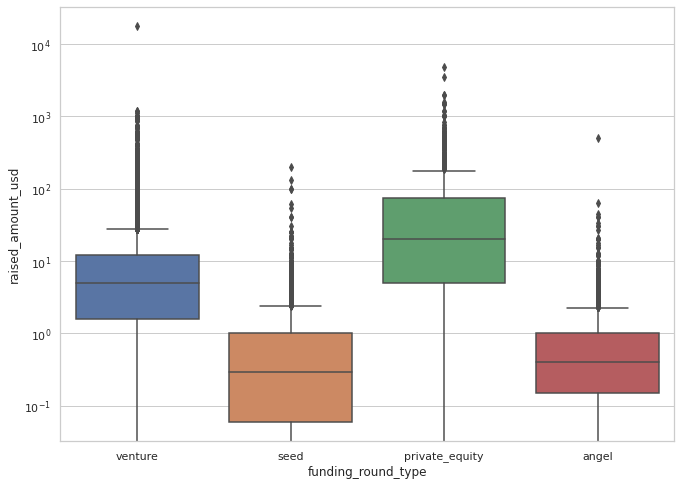

In [51]:
# let's plot the box plot 
sns.set(rc={'figure.figsize':(11,8)})
sns.set_style("whitegrid")
sns.boxplot(x='funding_round_type',y='raised_amount_usd',data=master_frame)
#plt.ylim(0, 76)
plt.yscale('log')
plt.show()

**There are so many outlier so we can calculate the median**

In [52]:
#calculating median investment amount for each of the four funding types.
round(master_frame.groupby('funding_round_type').raised_amount_usd.median(), 2)

funding_round_type
angel              0.40
private_equity    20.00
seed               0.29
venture            5.00
Name: raised_amount_usd, dtype: float64

**We have calulated median becuase there are so many outlier in this funding types**

**Question-1**

Representative funding amount of venture type

**Answer-5 million**

**Question-2**

Representative funding amount of angel type

**Answer-0.40 millions**

**Question-3**

Representative funding amount of seed type

**Answer-0.29 milllons**

**Question-4**

Representative funding amount of private equity type

**Answer-20 millions**

**Question-5**

Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, which investment type is the most suitable for them?

**Answer**

We can clearly predict from pie chart and box plot that most of the investors are investing in **venture funding type**. The median of funding of venture type is **5 million** so Spark Funds can choose this type of funding that is best suited for their strategy.

# **Checkpoint 3: Country Analysis**

In [53]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88375 entries, 0 to 114908
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                88375 non-null  object 
 1   name                     88374 non-null  object 
 2   homepage_url             88375 non-null  object 
 3   category_list            88375 non-null  object 
 4   status                   88375 non-null  object 
 5   country_code             83165 non-null  object 
 6   funding_round_permalink  88375 non-null  object 
 7   funding_round_type       88375 non-null  object 
 8   funded_at                88375 non-null  object 
 9   raised_amount_usd        76569 non-null  float64
dtypes: float64(1), object(9)
memory usage: 9.9+ MB


In [54]:
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.000000
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,0.700000
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3.406878
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2.000000


**Top nine countries which have received the highest total funding**

              raised_amount_usd
country_code                   
USA               398433.431399
CHN                37976.533110
GBR                19379.929716
IND                13876.121718
CAN                 8942.205684
FRA                 7045.117298
ISR                 6660.650477
DEU                 6207.489510
JPN                 3155.654754 

Top 9 countries in order are:


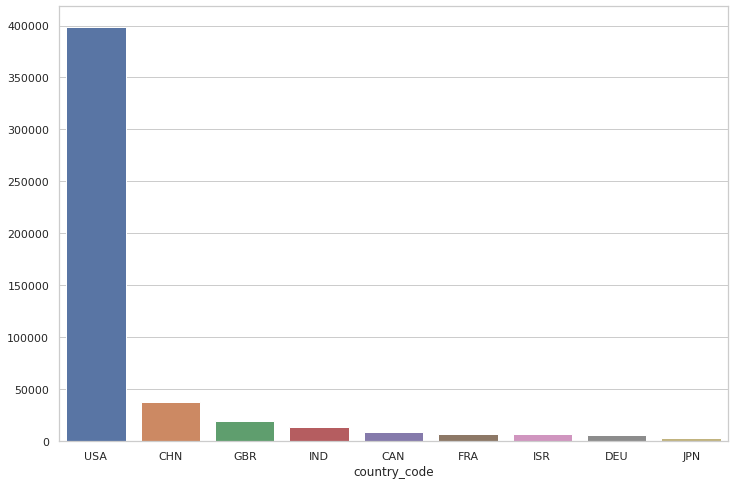

In [55]:
top9 = master_frame[master_frame['funding_round_type']=='venture'].groupby('country_code').sum().sort_values('raised_amount_usd', ascending=False).head(9)
plt.figure(figsize=(12, 8))
sns.barplot(x=top9.index, y=top9.values.ravel())
print(top9, '\n')
print("Top 9 countries in order are:")

**Top English Speaking countries**

**https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language**

**Question-1**

Top English speaking country

**Answer**

**USA-United States**

**Question-2**

Second English speaking country

**Answer**

**GBR-**
**United Kingdom**

**Question-3**

Third English speaking country

**Answer**

**IND-INDIA**

# Checkpoint 4: Sector Analysis 1

In [56]:
mapping=pd.read_csv('mapping.csv',encoding="cp437")
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [57]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88375 entries, 0 to 114908
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                88375 non-null  object 
 1   name                     88374 non-null  object 
 2   homepage_url             88375 non-null  object 
 3   category_list            88375 non-null  object 
 4   status                   88375 non-null  object 
 5   country_code             83165 non-null  object 
 6   funding_round_permalink  88375 non-null  object 
 7   funding_round_type       88375 non-null  object 
 8   funded_at                88375 non-null  object 
 9   raised_amount_usd        76569 non-null  float64
dtypes: float64(1), object(9)
memory usage: 9.9+ MB


In [58]:
# Generating a Primary Sector Column
master_frame['primary_sector'] = 0
master_frame['primary_sector'] = master_frame['category_list'].str.split('|', expand=True)

In [59]:
master_frame['primary_sector'].unique()

array(['Media', 'Application Platforms', 'Apps', 'Curated Web',
       'Software', 'Biotechnology', 'Analytics', 'Mobile', 'E-Commerce',
       'Internet Marketing', 'Education', 'Search', 'Art', 'Beauty',
       'Local Businesses', 'Cosmetics', 'Games', 'Hospitality',
       'Health Care', 'Advertising', 'Coffee', 'Enterprise Software',
       'Batteries', 'iOS', 'Health and Wellness', 'EdTech',
       'Social Travel', 'Audio', 'Health Diagnostics', 'Internet',
       'Local Search', 'Service Providers', 'Publishing',
       'Consumer Goods', 'Manufacturing', 'Augmented Reality',
       'Entertainment', 'Design', 'Travel', 'Finance', 'Cars',
       'Clean Technology', 'Chat', 'Cloud Computing', 'Geospatial',
       'Music Services', 'Doctors', 'Social Media', 'Non Profit',
       'Content', 'Consumers', 'Technology', 'Delivery', 'Big Data',
       'Android', 'Blogging Platforms', 'Customer Service', 'News',
       'Hardware + Software', 'Artificial Intelligence', 'Services',
       'D

In [60]:
mapping

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
683,Wholesale,0,0,0,0,0,0,0,1,0
684,Wine And Spirits,0,0,0,1,0,0,0,0,0
685,Wireless,0,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,0,1,0


In [61]:
# correcting improperly decoded words from mapping.csv
mapping.reset_index(inplace=True)
mapping['category_list'] = mapping['category_list'].str.replace('0', 'na')

In [62]:
mapping

,index,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,0,NaN,0,1,0,0,0,0,0,0,0
1,1,3D,0,0,0,0,0,1,0,0,0
2,2,3D Printing,0,0,0,0,0,1,0,0,0
3,3,3D Technology,0,0,0,0,0,1,0,0,0
4,4,Accounting,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
683,683,Wholesale,0,0,0,0,0,0,0,1,0
684,684,Wine And Spirits,0,0,0,1,0,0,0,0,0
685,685,Wireless,0,0,0,1,0,0,0,0,0
686,686,Women,0,0,0,0,0,0,0,1,0


In [63]:
# set category_list as index column for mapping df
mapping.set_index('category_list', inplace=True)
mapping.drop('index', axis=1, inplace=True)

# Generate dictionary of [primary_sec: main_sec] pairs
sector_dict = {idx: next(k for k in mapping if row[k]==1)
     for idx, row in mapping.iterrows()}

In [64]:
mapping

,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
category_list,,,,,,,,,
NaN,0,1,0,0,0,0,0,0,0
3D,0,0,0,0,0,1,0,0,0
3D Printing,0,0,0,0,0,1,0,0,0
3D Technology,0,0,0,0,0,1,0,0,0
Accounting,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
Wholesale,0,0,0,0,0,0,0,1,0
Wine And Spirits,0,0,0,1,0,0,0,0,0
Wireless,0,0,0,1,0,0,0,0,0


In [65]:
# map the main sectors using sector_dictionary
master_frame['main_sector'] = master_frame['primary_sector'].map(sector_dict)

In [66]:
master_frame

,permalink,name,homepage_url,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.000000,Media,Entertainment
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN,Application Platforms,"News, Search and Messaging"
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,0.700000,Application Platforms,"News, Search and Messaging"
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3.406878,Apps,"News, Search and Messaging"
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2.000000,Curated Web,"News, Search and Messaging"
...,...,...,...,...,...,...,...,...,...,...,...,...
114903,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,/funding-round/171693e1e07e0230defd8fddb6de4515,venture,01-04-2012,1.587301,Enterprise Software,Others
114904,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,/funding-round/22ef2fafb4d20ac3aa4b86143dbf6c8e,seed,01-11-2011,0.007000,Advertising,"Social, Finance, Analytics, Advertising"
114905,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,/funding-round/6ba41360588bc6e3f77e9b50a0ebfafa,seed,01-08-2013,0.033149,Advertising,"Social, Finance, Analytics, Advertising"
114907,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,01-05-2013,0.032842,Advertising,"Social, Finance, Analytics, Advertising"


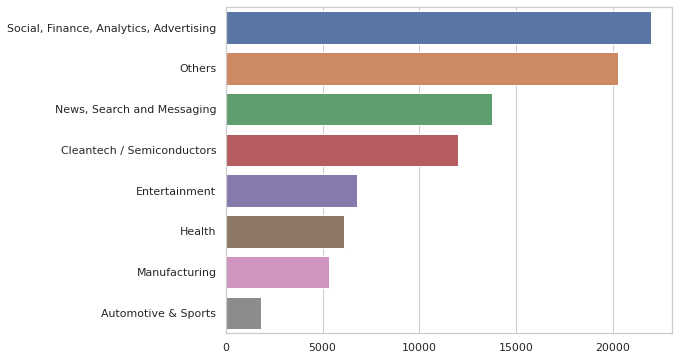

Social, Finance, Analytics, Advertising    21992
Others                                     20294
News, Search and Messaging                 13788
Cleantech / Semiconductors                 12014
Entertainment                               6755
Health                                      6083
Manufacturing                               5354
Automotive & Sports                         1807
Name: main_sector, dtype: int64


In [67]:
# Drop all rows which couldn't get mapped (and we drop blanks as there are only 8 sectors)
master_frame.dropna(subset=['main_sector'], inplace=True)
master_frame = master_frame[master_frame['main_sector'] != 'Blanks']
sectors = master_frame.main_sector.value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=sectors.values, y=sectors.index)
plt.show()
print(sectors)

In [68]:
master_frame[['permalink','primary_sector', 'main_sector']].head(10)

,permalink,primary_sector,main_sector
0,/organization/-fame,Media,Entertainment
1,/organization/-qounter,Application Platforms,"News, Search and Messaging"
2,/organization/-qounter,Application Platforms,"News, Search and Messaging"
3,/organization/-the-one-of-them-inc-,Apps,"News, Search and Messaging"
4,/organization/0-6-com,Curated Web,"News, Search and Messaging"
5,/organization/004-technologies,Software,Others
7,/organization/0ndine-biomedical-inc,Biotechnology,Cleantech / Semiconductors
8,/organization/0ndine-biomedical-inc,Biotechnology,Cleantech / Semiconductors
9,/organization/0xdata,Analytics,"Social, Finance, Analytics, Advertising"
10,/organization/0xdata,Analytics,"Social, Finance, Analytics, Advertising"


# Checkpoint 5: Sector Analysis 2

In [69]:
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.000000,Media,Entertainment
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN,Application Platforms,"News, Search and Messaging"
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,0.700000,Application Platforms,"News, Search and Messaging"
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3.406878,Apps,"News, Search and Messaging"
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2.000000,Curated Web,"News, Search and Messaging"


In [70]:
# Let's drop company_permalink column
master_frame=master_frame.drop(['category_list'],axis=1)

In [71]:
master_frame.head()

,permalink,name,homepage_url,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector
0,/organization/-fame,#fame,http://livfame.com,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.000000,Media,Entertainment
1,/organization/-qounter,:Qounter,http://www.qounter.com,operating,USA,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN,Application Platforms,"News, Search and Messaging"
2,/organization/-qounter,:Qounter,http://www.qounter.com,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,0.700000,Application Platforms,"News, Search and Messaging"
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,operating,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3.406878,Apps,"News, Search and Messaging"
4,/organization/0-6-com,0-6.com,http://www.0-6.com,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2.000000,Curated Web,"News, Search and Messaging"


In [72]:
master_frame['main_sector'].unique()

array(['Entertainment', 'News, Search and Messaging', 'Others',
       'Cleantech / Semiconductors',
       'Social, Finance, Analytics, Advertising', 'Health',
       'Manufacturing', 'Automotive & Sports'], dtype=object)

In [73]:
mapping

,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
category_list,,,,,,,,,
NaN,0,1,0,0,0,0,0,0,0
3D,0,0,0,0,0,1,0,0,0
3D Printing,0,0,0,0,0,1,0,0,0
3D Technology,0,0,0,0,0,1,0,0,0
Accounting,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
Wholesale,0,0,0,0,0,0,0,1,0
Wine And Spirits,0,0,0,1,0,0,0,0,0
Wireless,0,0,0,1,0,0,0,0,0


In [74]:
master_frame.to_csv('master_frame1.csv')

In [75]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88087 entries, 0 to 114908
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                88087 non-null  object 
 1   name                     88086 non-null  object 
 2   homepage_url             88087 non-null  object 
 3   status                   88087 non-null  object 
 4   country_code             82890 non-null  object 
 5   funding_round_permalink  88087 non-null  object 
 6   funding_round_type       88087 non-null  object 
 7   funded_at                88087 non-null  object 
 8   raised_amount_usd        76305 non-null  float64
 9   primary_sector           88087 non-null  object 
 10  main_sector              88087 non-null  object 
dtypes: float64(1), object(10)
memory usage: 8.1+ MB


**Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding type FT falling within the 5-15 million USD range. The three data frames should contain:**

- All the columns of the master_frame along with the primary sector and the main sector

- The total number (or count) of investments for each main sector in a separate column

- The total amount invested in each main sector in a separate column

In [76]:
master_frame

,permalink,name,homepage_url,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector
0,/organization/-fame,#fame,http://livfame.com,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.000000,Media,Entertainment
1,/organization/-qounter,:Qounter,http://www.qounter.com,operating,USA,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN,Application Platforms,"News, Search and Messaging"
2,/organization/-qounter,:Qounter,http://www.qounter.com,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,0.700000,Application Platforms,"News, Search and Messaging"
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,operating,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3.406878,Apps,"News, Search and Messaging"
4,/organization/0-6-com,0-6.com,http://www.0-6.com,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2.000000,Curated Web,"News, Search and Messaging"
...,...,...,...,...,...,...,...,...,...,...,...
114903,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,operating,CHN,/funding-round/171693e1e07e0230defd8fddb6de4515,venture,01-04-2012,1.587301,Enterprise Software,Others
114904,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,operating,HRV,/funding-round/22ef2fafb4d20ac3aa4b86143dbf6c8e,seed,01-11-2011,0.007000,Advertising,"Social, Finance, Analytics, Advertising"
114905,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,operating,HRV,/funding-round/6ba41360588bc6e3f77e9b50a0ebfafa,seed,01-08-2013,0.033149,Advertising,"Social, Finance, Analytics, Advertising"
114907,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,operating,HRV,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,01-05-2013,0.032842,Advertising,"Social, Finance, Analytics, Advertising"


**Let's create First DataFrame**

In [77]:
D1 = master_frame[(master_frame['country_code'] == 'USA') & 
             (master_frame['raised_amount_usd'] >= 5) & 
             (master_frame['raised_amount_usd'] <= 15)]
D1_gr = D1[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(
    columns={'sum':'Total_amount','count' : 'Total_count'})
D1 = D1.merge(D1_gr, how='left', on ='main_sector')
D1.head()

,permalink,name,homepage_url,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector,"(raised_amount_usd, Total_amount)","(raised_amount_usd, Total_count)"
0,/organization/0xdata,H2O.ai,http://h2o.ai/,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8.900000,Analytics,"Social, Finance, Analytics, Advertising",24116.367082,2762
1,/organization/1-800-publicrelations-inc-,"1-800-PublicRelations, Inc.",http://www.1800publicrelations.com,operating,USA,/funding-round/11c228f58831bc7ed337ef69ecc560c2,private_equity,01-02-2015,6.000000,Internet Marketing,"Social, Finance, Analytics, Advertising",24116.367082,2762
2,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5.000000,Apps,"News, Search and Messaging",13895.922329,1586
3,/organization/128-technology,128 Technology,http://www.128technology.com/,operating,USA,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,16-12-2014,11.999347,Service Providers,Others,25182.638405,2833
4,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,operating,USA,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,15-10-2013,15.000000,Manufacturing,Manufacturing,7015.358239,776


**Let's create a Second Frame**

In [78]:
D2 = master_frame[(master_frame['country_code'] == 'GBR') & 
             (master_frame['raised_amount_usd'] >= 5) & 
             (master_frame['raised_amount_usd'] <= 15)]
D2_gr = D2[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(
    columns={'sum':'Total_amount','count' : 'Total_count'})
D2 = D2.merge(D2_gr, how='left', on ='main_sector')
D2.head()


,permalink,name,homepage_url,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector,"(raised_amount_usd, Total_amount)","(raised_amount_usd, Total_count)"
0,/organization/365scores,365Scores,http://biz.365scores.com,operating,GBR,/funding-round/48212f931f542fdef78810bc87aef086,venture,29-09-2014,5.500000,Android,"Social, Finance, Analytics, Advertising",1146.855728,140
1,/organization/5app,5app,http://5app.com/,operating,GBR,/funding-round/6ff332e6b15150ba2365e743b408199e,seed,12-06-2014,5.100000,Mobile,"News, Search and Messaging",653.788167,80
2,/organization/7digital,7digital,http://about.7digital.com,acquired,GBR,/funding-round/b5ad7ed7baddd3974bd51403f17dd88f,venture,01-01-2008,8.468328,Content Creators,Entertainment,478.360944,55
3,/organization/7digital,7digital,http://about.7digital.com,acquired,GBR,/funding-round/eafacfcceb1fbc4fd605f641b603313e,venture,19-10-2012,10.000000,Content Creators,Entertainment,478.360944,55
4,/organization/90min,90min,http://www.90min.com,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15.000000,Media,Entertainment,478.360944,55


**Let's Create a third Dataframe**

In [79]:
D3 = master_frame[(master_frame['country_code'] == 'IND') & 
             (master_frame['raised_amount_usd'] >= 5) & 
             (master_frame['raised_amount_usd'] <= 15)]
D3_gr = D3[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(
    columns={'sum':'Total_amount','count' : 'Total_count'})
D3 = D3.merge(D3_gr, how='left', on ='main_sector')
D3.head()


,permalink,name,homepage_url,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector,"(raised_amount_usd, Total_amount)","(raised_amount_usd, Total_count)"
0,/organization/-fame,#fame,http://livfame.com,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.000000,Media,Entertainment,293.830000,34
1,/organization/21diamonds-india,21Diamonds,http://www.21diamonds.de,operating,IND,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,15-11-2012,6.369507,E-Commerce,Others,1045.909507,114
2,/organization/a-little-world,A LITTLE WORLD,http://alittleworld.com,operating,IND,/funding-round/18d98f82ed392b1609975b81f3e8b3fb,venture,09-09-2008,6.410000,Finance,"Social, Finance, Analytics, Advertising",558.449550,63
3,/organization/adlabs-imagica,Adlabs Imagica,http://www.adlabsimagica.com,operating,IND,/funding-round/508d3c83daaae9fda3ba6f9682c78f6c,venture,28-10-2014,8.180000,Entertainment,Entertainment,293.830000,34
4,/organization/agile,Agile,http://www.agile-ft.com,operating,IND,/funding-round/cd3dd1c98ce9d0f632d8752163941674,venture,01-05-2011,5.740000,Finance,"Social, Finance, Analytics, Advertising",558.449550,63


**Question-1**

Total number of Investments (count)

In [80]:
#Total number of investments (count)
print(D1.raised_amount_usd.count())
print(D2.raised_amount_usd.count())
print(D3.raised_amount_usd.count())


11898
625
336


**Answer**

**D1**-11898

**D2**-625

**D3**-336

**Question-2**

Total amount of investment (USD)

In [81]:
#Total amount of investment (USD)
print(round(D1.raised_amount_usd.sum(), 2))
print(round(D2.raised_amount_usd.sum(), 2))
print(round(D3.raised_amount_usd.sum(), 2))


105926.99
5391.43
3000.94


**Answer**

**D1**-105926.99

**D2**-5391.43

**D3**-3000.94

**Question-3** to **Question-8**

**D1 Sector-vise Analysis**

In [82]:
D1_gr


raised_amount_usd            
                                             Total_amount Total_count
main_sector                                                          
Automotive & Sports                           1443.429634         166
Cleantech / Semiconductors                   21034.331967        2277
Entertainment                                 5079.150292         592
Health                                        8159.793562         906
Manufacturing                                 7015.358239         776
News, Search and Messaging                   13895.922329        1586
Others                                       25182.638405        2833
Social, Finance, Analytics, Advertising      24116.367082        2762

**Answer**

**USA**

**Top Sector**-Others-**2833**

**Second Sector**-Social, Finance, Analytics, Advertising-**2762**

**Third Sector**-Cleantech / Semiconductors-**2277**

**D2 Sector-vise analysis**

In [83]:
D2_gr

raised_amount_usd            
                                             Total_amount Total_count
main_sector                                                          
Automotive & Sports                            173.112570          17
Cleantech / Semiconductors                    1126.787153         126
Entertainment                                  478.360944          55
Health                                         231.537510          26
Manufacturing                                  366.123846          41
News, Search and Messaging                     653.788167          80
Others                                        1214.861340         140
Social, Finance, Analytics, Advertising       1146.855728         140

**Answer**

**GBR**

**Top sector** -Others-**140**

**Second Sector**-Social, Finance, Analytics, Advertising-**140**

**Third Sector**-Cleantech / Semiconductors-**126**

**D3- Sector-vise analysis**

In [84]:
D3_gr

raised_amount_usd            
                                             Total_amount Total_count
main_sector                                                          
Automotive & Sports                            136.900000          13
Cleantech / Semiconductors                     165.380000          20
Entertainment                                  293.830000          34
Health                                         173.740000          20
Manufacturing                                  200.900000          21
News, Search and Messaging                     425.834545          51
Others                                        1045.909507         114
Social, Finance, Analytics, Advertising        558.449550          63

**Answer**

**IND**

**Top Sector**-Others-**114**

**Second Sector**-Social, Finance, Analytics, Advertising-**63**

**Third Sector**-News, Search and Messaging-**51**


**Question-9**

For point 3 (top sector count-wise), which company received the highest investment?

In [85]:
#For the top sector USA , which company received the highest investment?
company = D1[D1['main_sector']=='Others']
company = company.pivot_table(values = 'raised_amount_usd', index = 'permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

                           raised_amount_usd
permalink                                   
/organization/virtustream               64.3


**Anwser**

virtustream

In [86]:
#For the top sector GBR , which company received the highest investment?
company = D2[D2['main_sector']=='Others']
company = company.pivot_table(values = 'raised_amount_usd', index = 'permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

                              raised_amount_usd
permalink                                      
/organization/electric-cloud               37.0


**Answer**

electric-cloud 

In [87]:
#For the top sector IND , which company received the highest investment?
company = D3[D3['main_sector']=='Others']
company = company.pivot_table(values = 'raised_amount_usd', index = 'permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

                            raised_amount_usd
permalink                                    
/organization/firstcry-com               39.0


**Answer**

firstcry-com

**Question-10**

For point 4 (second best sector count-wise), which company received the highest investment?

In [88]:
#For the second top sector USA , which company received the highest investment?
company = D1[D1['main_sector']=='Social, Finance, Analytics, Advertising']
company = company.pivot_table(values = 'raised_amount_usd', index = 'permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

                            raised_amount_usd
permalink                                    
/organization/choicestream               73.3


**Answer**

choicestream

In [89]:
#For the second top sector GBR , which company received the highest investment?
company = D2[D2['main_sector']=='Social, Finance, Analytics, Advertising']
company = company.pivot_table(values = 'raised_amount_usd', index = 'permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

                                     raised_amount_usd
permalink                                             
/organization/celltick-technologies               37.5


**Answer**

celltick-technologies

In [90]:
#For the second top sector IND , which company received the highest investment?
company = D3[D3['main_sector']=='Social, Finance, Analytics, Advertising']
company = company.pivot_table(values = 'raised_amount_usd', index = 'permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

                               raised_amount_usd
permalink                                       
/organization/manthan-systems               50.7


**Answer**

manthan-systems


# Checkpoint 6: Plots

**Question 1**

A plot showing the representative amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

In [91]:
fund_type_df =master_frame.groupby('funding_round_type').agg({'raised_amount_usd':['sum','mean']})
fund_type_df

raised_amount_usd           
                                 sum       mean
funding_round_type                             
angel                    4508.716940   0.952211
private_equity         133994.828518  74.194257
seed                    16465.375525   0.726307
venture                550629.668494  11.692141

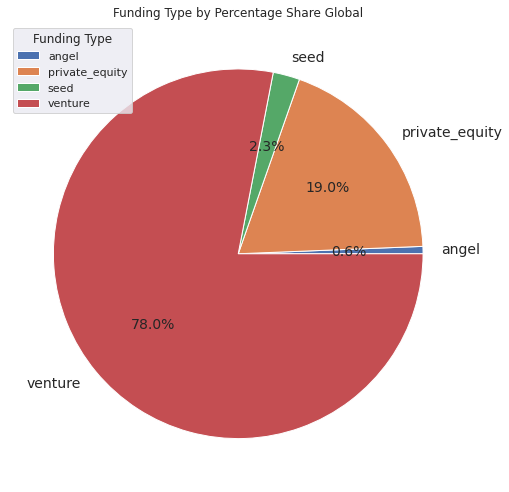

In [92]:
#plotting a pie
sns.set()
share_plot = fund_type_df.plot.pie(y=('raised_amount_usd','sum'),autopct='%.1f%%',legend=True,use_index=True,title='Funding Type by Percentage Share Global', textprops={'fontsize': 14}, figsize=(8.5,8.5))
share_plot.set_xlabel("")
share_plot.set_ylabel("")
share_plot.legend(title="Funding Type")
plt.show()

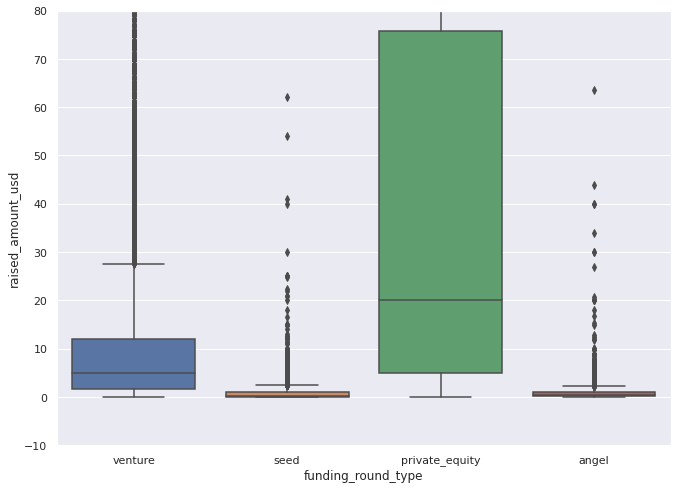

In [93]:
# let's plot the box plot 
sns.boxplot(x='funding_round_type',y='raised_amount_usd',data=master_frame)
plt.ylim(-10,80)
#plt.yscale('log')
plt.show()

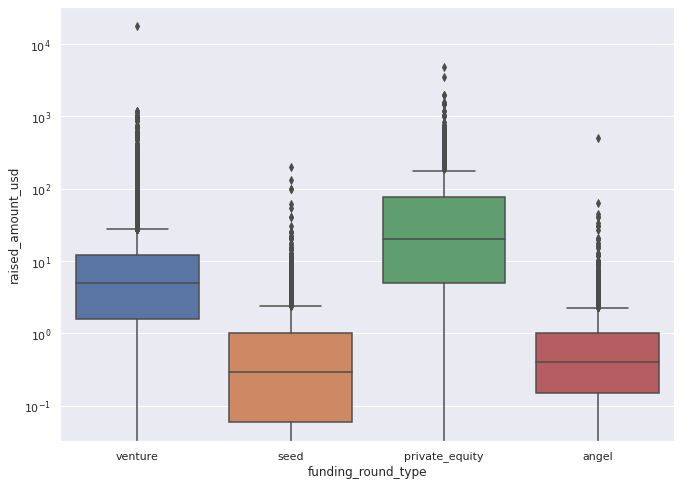

In [94]:
# let's plot the box plot 
sns.boxplot(x='funding_round_type',y='raised_amount_usd',data=master_frame)
#plt.ylim(-10,80)
plt.yscale('log')
plt.show()

**Question 2**

A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

In [95]:
top9

,raised_amount_usd
country_code,
USA,398433.431399
CHN,37976.533110
GBR,19379.929716
IND,13876.121718
CAN,8942.205684
FRA,7045.117298
ISR,6660.650477
DEU,6207.489510
JPN,3155.654754


              raised_amount_usd
country_code                   
USA               398433.431399
CHN                37976.533110
GBR                19379.929716
IND                13876.121718
CAN                 8942.205684
FRA                 7045.117298
ISR                 6660.650477
DEU                 6207.489510
JPN                 3155.654754 

Top 9 countries in order are:


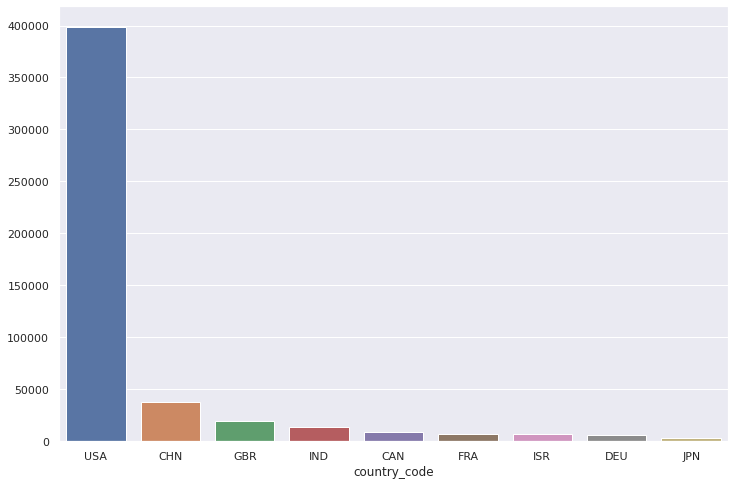

In [96]:
plt.figure(figsize=(12, 8))
sns.barplot(x=top9.index, y=top9.values.ravel())
print(top9, '\n')
print("Top 9 countries in order are:")
plt.show()

**Answer**

Top Three english speaking countries 

1. **USA**

2. **GBR**

3. **IND**



**Question-3**

A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). This plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3.

In [97]:
#concatenating all top3 countries df having top 3 sectors
top_3_sector_by_country_all =  pd.concat([D1,D2,D3],axis=0)
top_3_sector_by_country_all.head()

,permalink,name,homepage_url,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector,"(raised_amount_usd, Total_amount)","(raised_amount_usd, Total_count)"
0,/organization/0xdata,H2O.ai,http://h2o.ai/,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8.900000,Analytics,"Social, Finance, Analytics, Advertising",24116.367082,2762
1,/organization/1-800-publicrelations-inc-,"1-800-PublicRelations, Inc.",http://www.1800publicrelations.com,operating,USA,/funding-round/11c228f58831bc7ed337ef69ecc560c2,private_equity,01-02-2015,6.000000,Internet Marketing,"Social, Finance, Analytics, Advertising",24116.367082,2762
2,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5.000000,Apps,"News, Search and Messaging",13895.922329,1586
3,/organization/128-technology,128 Technology,http://www.128technology.com/,operating,USA,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,16-12-2014,11.999347,Service Providers,Others,25182.638405,2833
4,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,operating,USA,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,15-10-2013,15.000000,Manufacturing,Manufacturing,7015.358239,776


In [98]:
top_3_sector=top_3_sector_by_country_all[(top_3_sector_by_country_all['main_sector']=='Others')|(top_3_sector_by_country_all['main_sector'] =='Social, Finance, Analytics, Advertising')|(top_3_sector_by_country_all['main_sector'] =='Social, Finance, Analytics, Advertising')|(top_3_sector_by_country_all['main_sector'] =='Cleantech / Semiconductors')]


In [99]:
top_3_sector=top_3_sector[['country_code','main_sector','raised_amount_usd']]
top_3_sector['main_sector'].unique()

array(['Social, Finance, Analytics, Advertising', 'Others',
       'Cleantech / Semiconductors'], dtype=object)

In [100]:
top_3_sector

,country_code,main_sector,raised_amount_usd
0,USA,"Social, Finance, Analytics, Advertising",8.900000
1,USA,"Social, Finance, Analytics, Advertising",6.000000
3,USA,Others,11.999347
9,USA,Others,14.000000
10,USA,Others,5.000000
...,...,...,...
317,IND,Others,5.000000
318,IND,Others,11.000000
319,IND,Cleantech / Semiconductors,8.000000
327,IND,"Social, Finance, Analytics, Advertising",12.700000


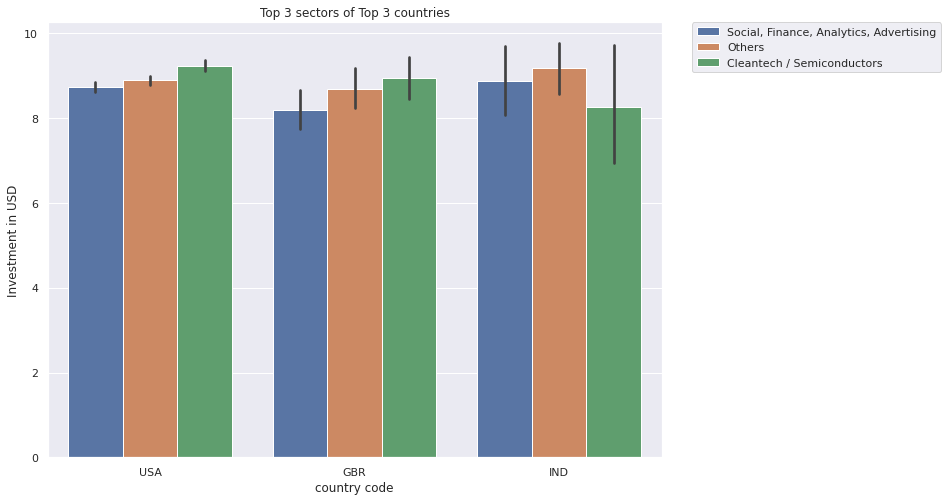

In [101]:
#Plot
top_sectors_plot = sns.barplot(x='country_code', y='raised_amount_usd', hue='main_sector', data=top_3_sector)
plt.ylabel('Investment in USD')
plt.xlabel('country code')
plt.title('Top 3 sectors of Top 3 countries')
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1),loc=2,borderaxespad=0.)
plt.show()

#  Conclusion

Based on analysis performed, Spark funds should invest in-

- Funding Type-**Venture funding types**


- Top English Speaking countries to invest in- **USA,United Kingdom and India**


- Top sectors to invest in-  **Others,Social-Finance-Analytics-Advertising,Cleantech / Semiconductors**


- **Top companies to invest in**- 
                            USA- virtustream-                             64.3     millions

                            USA -choicestream-                            73.3     millions
                        
                            India(IND)- manthan-systems-                  50.7     millions
                            
                            India(IND) -firstcry-com-                     39       millions

                            United Kingdom(GBR) -electric-cloud           37       millions

                            United Kingdom(GBR)-celltick-technologies-    37.5     millions